# Jupyter Notebook for analysis of 'tips' dataset

Import Python packages used for data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Get the dataset 'tips' from Seaborn into a dataframe, extract the columnames (for use in analysis) and display them.

In [2]:
df = sns.load_dataset('tips')
columnNames = list(df.head(0))
print(columnNames)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


## Part 1 - Overall evaluation of variables

In [ ]:
Display the full dataset. We need to use the pandas set_option, otherwise the output is truncated.
ref https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe

In [3]:
pd.set_option('display.max_rows',len(df.index))
pd.set_option('display.max_columns', None)
print(df)

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

We'll change the name of the last column to 'party_size' just to make it clearer what it is:  
(ref https://www.google.com/search?q=python+change+dataset+column+name&rlz=1C1AVFC_enIE848IE849&oq=python+change+dataset+column+name&aqs=chrome..69i57j33l2.12423j0j7&sourceid=chrome&ie=UTF-8

In [4]:
df=df.rename(columns = {'size':'party_size'})
columnNames = list(df.head(0))
print(columnNames)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'party_size']


Get the basic statistical values for the numeric variables total_bill, tip and party_size :

In [5]:
df.describe()

,total_bill,tip,party_size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Find the average value of a tip as a percentage of the total bill :
(ref https://stackoverflow.com/questions/41286569/get-total-of-pandas-column)

In [6]:
percent = round((100*(df['tip'].sum()/df['total_bill'].sum())),2)
print(percent)

15.15


So on average tips are paid at roughly 15% of the total bill.

Plot the total bill values against the tip values (see the following plot).   
(ref https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850)  
There is, as might be expected, a correlation, but with plenty of noise. The index values for the columnnames are :  
total_bill = 0  
tip        = 1  
sex        = 2  
smoker     = 3  
day        = 4  
time       = 5  
party_size = 6

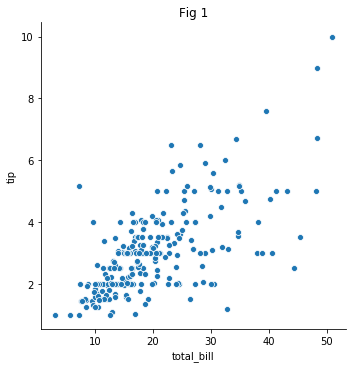

In [64]:
sns.set
sns.relplot(x=columnNames[0],y=columnNames[1],data=df)
plt.title('Fig 1')
plt.show()

For the same type of plot, include each of the other non-numeric variables (gender, smoker, day, time) to see if any of them strongly influence either the total spend or the tip amount.  
  
First - _gender_

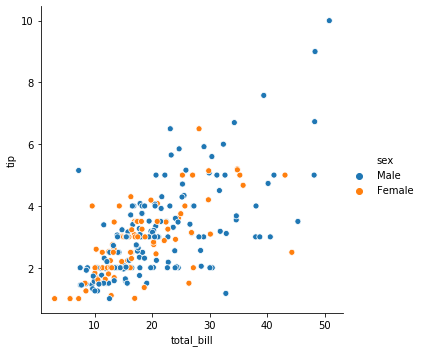

In [8]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[2],data=df)
plt.title('Fig 2')
plt.show()

The largest bills are principally paid by males (12 of the highest 14), and outlying tips (on the high side) are also mostly paid by males (9 of the top 10). The 3 smallest bills are for females, but outside of these extremes, which represent about 1/10th of the total, there is little to distinguish the genders. There are 2 tips that are disproportionately high relative to the total bill, one paid by a male, the other by a female.   

Now check whether being a _smoker_ influences the bill : 

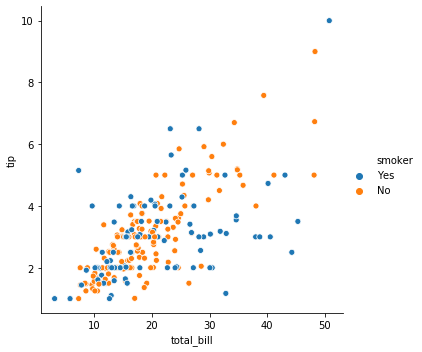

In [9]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[3],data=df)
plt.title('Fig 3')
plt.show()

The clearest distinguishing feature here is that for the highest values of total bill the non-smokers tend to give higher tips than the smokers, although the highest tip of all is paid by a smoker. Up to a total bill of roughly 27 dollars, there is little difference between the two. The two outstanding tips (highest) as a proportion of the total bill though were paid by smokers.  
Next, check the _day of the week_ :

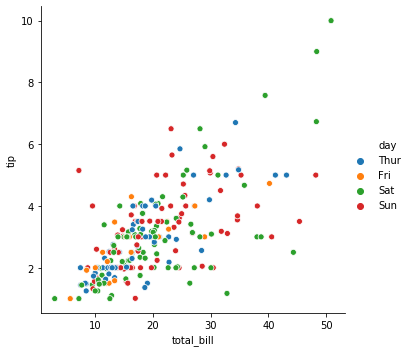

In [10]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[4],data=df)
plt.title('Fig 4')
plt.show()

Of the highest 14 total bills, the majority come from Saturdays and Sundays, with half of them from Saturday, and 4 from Sunday. Bills on Friday are lower than on other days, with only 1 in the top 37.
For total bills below about 30 dollars the day doesn't greatly influence the bill.  
Now check between _lunch and dinner time_ :

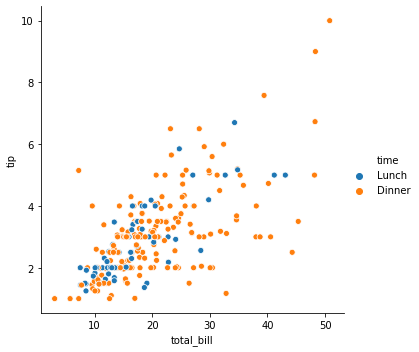

In [11]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[5],data=df)
plt.title('Fig 5')
plt.show()

As might be expected, the highest bills are mostly from dinner time, with 12 of the highest 14. There is also a strong pattern though of the lower and higher tips being given at dinner time, with those at lunch time being closer to the mean. 

Finally we'll examine the influence of _party size_. Include 'legend="full"' so that all of the party sizes are shown, otherwise, with party-size being numeric relplot groups them into evenly spaced values, with the legend showing values of 0, 2, 4, 6  
(ref https://seaborn.pydata.org/generated/seaborn.scatterplot.htmlFirst).   
Plot as a simple entity, and then as the total bill and tip per person:

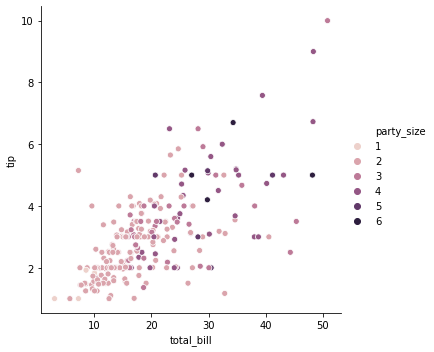

In [12]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[6],data=df,legend="full")
plt.title('Fig 6')
plt.show()

As might be expected, the lower value of total bills are dominated by the smaller parties.  
Now plot the varlues _per person_ (make sure you've changed the name of the 'size' column up above 
to 'party_size', otherwise this will fail):  
(ref https://stackoverflow.com/questions/35439613/python-pandas-dividing-column-by-another-column)

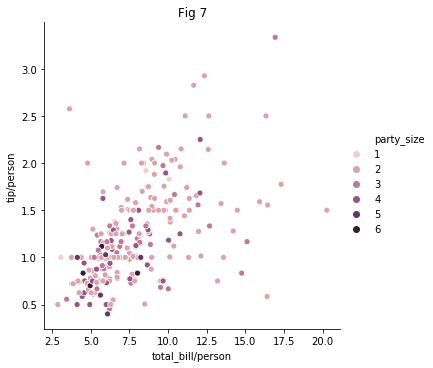

In [65]:
df['tip/person'] = df['tip']/df['party_size']
df['total_bill/person'] = df['total_bill']/df['party_size']
columnNames = list(df.head(0))
sns.relplot(x=columnNames[7],y=columnNames[8],hue=columnNames[6],data=df,legend="full")
plt.title('Fig 7')
plt.show()

The plot shows that the total bill per person for larger parties is significantly lower than for smaller parties, as is the tip per person. The average values for total_bill and tip per person based on party size are :    
(ref https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas)  
(ref https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places)

In [66]:
mean_list=list(df.groupby(columnNames[6])[columnNames[7]].mean())
means = [ round(elem, 2) for elem in mean_list ]
print ("Mean values of Total Bill per person by party size",  means)
mean_list=list(df.groupby(columnNames[6])[columnNames[8]].mean())
means = [ round(elem, 2) for elem in mean_list ]
print ("Mean values of Tip per person by party size",  means)

Mean values of Total Bill per person by party size [7.24, 8.22, 7.76, 7.15, 6.01, 5.8]
Mean values of Tip per person by party size [1.44, 1.29, 1.13, 1.03, 0.81, 0.87]


These values reinforce the picture presented in Fig 7, with a 2 person party paying on average 42% more per person than in a party of 6, and a single person giving a tip that is 78% higher than the tip given per person in a party of 5.

## Part 2 Analysis of relationship between total_bill and tip

In [8]:
print(df.corr(method ='pearson'))
print(df.corr(method ='kendall'))
print(df.corr(method ='spearman'))

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000
            total_bill       tip      size
total_bill    1.000000  0.517181  0.484342
tip           0.517181  1.000000  0.378185
size          0.484342  0.378185  1.000000
            total_bill       tip      size
total_bill    1.000000  0.678968  0.604791
tip           0.678968  1.000000  0.468268
size          0.604791  0.468268  1.000000


Before checking whether or not there is a statistically significant correlation between total_bill and tip we need to examine the distribution of each variable - this determines which type of statistical tests are appropriate for assessing correlation, and depend upon how 'Normal' the distributions are (clumped around a central mean value with small numbers of outliers). First look at a histogram plot of some random values generated to be normally distributed :  
(ref https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)

(array([  13.,   86.,  343.,  795., 1358., 1286.,  761.,  278.,   71.,
           9.]),
 array([-3.48137199, -2.77573544, -2.07009889, -1.36446235, -0.6588258 ,
         0.04681075,  0.7524473 ,  1.45808384,  2.16372039,  2.86935694,
         3.57499348]),
 <a list of 10 Patch objects>)

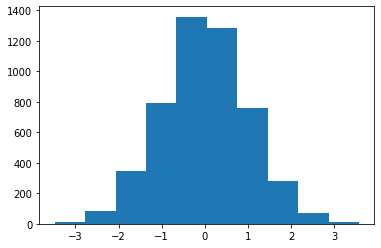

In [14]:
import numpy as np
plt.hist(np.random.randn(5000))

Now plot histograms of the total_bill and the tip data :

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

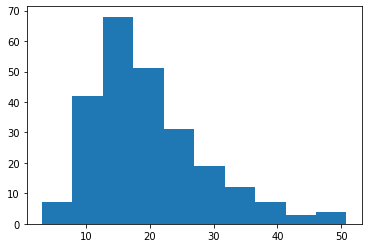

In [3]:
plt.hist(df['total_bill'])

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

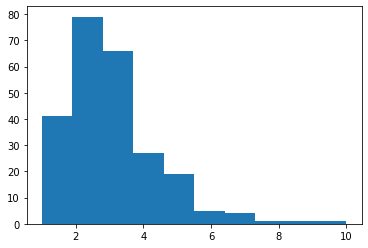

In [4]:
plt.hist(df['tip'])

Both of these plots are clearly skewed towards the lower ends of the range, so it appears that they do not fit the Normal (also called Gaussian) distribution. Carry out a statistical test also, just to confirm this - the Shapiro-Wilks test. This test returns a value (the p-value, a measure of how probable it is that a result is obtained), that if it is greater than a given threshold indicates that the data are Normal, and if it is less than the threshold that the data are not Normal :
(ref https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [16]:
from scipy.stats import shapiro
stat, p = shapiro(df['total_bill'])
if p > 0.05:
	print('Total_bill data look Normal')
else:
	print('Total_bill data do not look Normal')
stat, p = shapiro(df['tip'])
if p > 0.05:
	print('Tip data look Normal')
else:
	print('Tip data do not look Normal')

Total_bill data do not look Normal
Tip data do not look Normal


The Shapiro-Wilks test confirms the impression provided by the histograms that neither of the variables are Normally distributed. However, the general shape of the two histograms is similar. 
Now use a statistical test designed to measure the correlation between two non-Normally distributed variables - the Spearmann test:  

(ref https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)

In [18]:
from scipy.stats import spearmanr
coef, p = spearmanr(df['total_bill'], df['tip'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Data are uncorrelated p=%.3f' % p)
else:
	print('Data are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.679
Data are correlated p=0.000


The coefficient value of 0.679 indicates a strong positive correlation between the values of total-bill and tip (as might be expected given societal norms). The range used for the coefficient is -1 to 1, with -1 indicating a perfect negative correlation, 0 no correlation, and 1 a perfect positive correlation. The 'p' value of 0 indicates that the observed values are unlikely to be due to chance.  
(ref https://geographyfieldwork.com/SpearmansRankCalculator.html)  
(ref https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php)